# ARGENTINE GOVERNMENT DATA (OIL AND GAS) v2

CSV data set used in this notebook downloable at: https://bit.ly/3UwPbbG 

Data property of:
*Secretaría de Energía. Subsecretaría de Planeamiento Energético. Dirección Nacional de Escenarios y Evaluación de Proyectos. Dirección de Información Energética.Tecnología de la Información.*

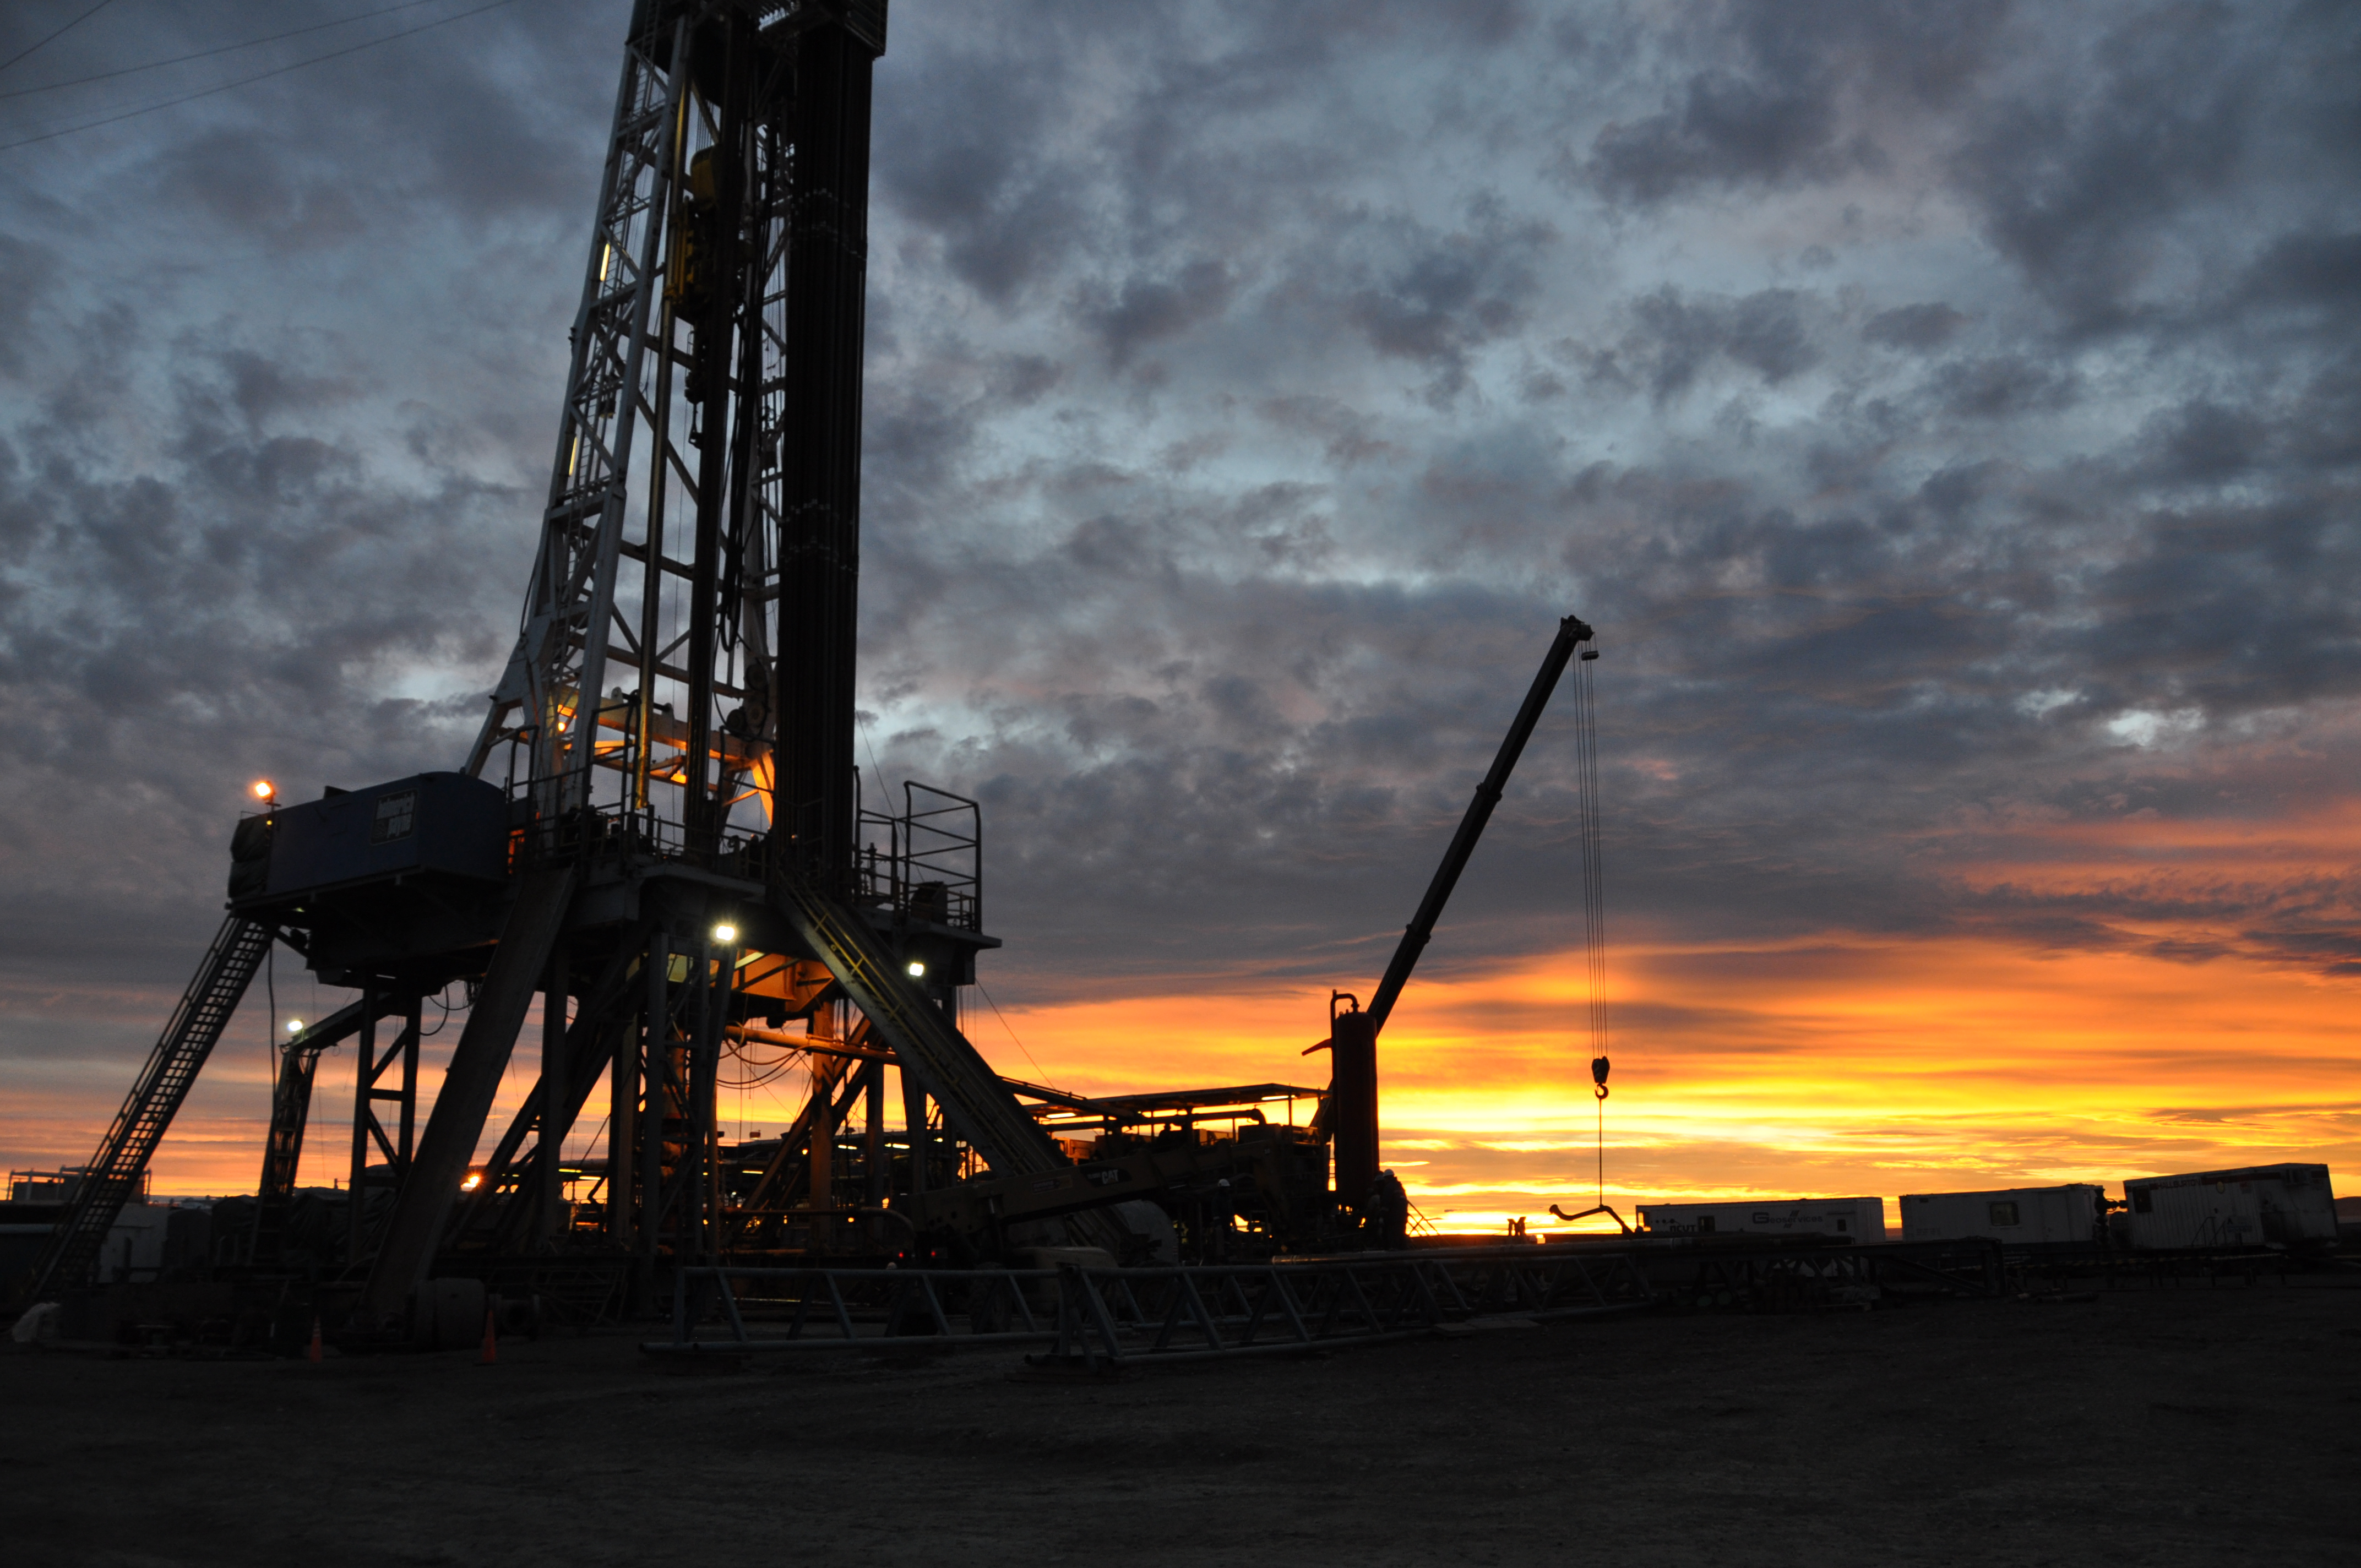

In [1]:
from IPython.display import Image
#Esta es la imagen satelital y el área de consesion (intentar con QGIS)
Image('img/DSC_0330.JPG', width=1200 , height=800)

# EDA

This is a very complete and large data set, so our first step consists of exploratory data analysis (EDA). Although data is provided at a monthly frequency, to reduce complexity we will work with data on a yearly frequency.

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import urllib
import missingno as msno
from termcolor import colored

# Set stylistic options for plots generated later on
sns.set_context("paper")
plt.style.use('fivethirtyeight')

In [23]:
# Define some colors for later on
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'




# Check for data
data_url = 'http://datos.energia.gob.ar/dataset/c846e79c-026c-4040-897f-1ad3543b407c/resource/b5b58cdc-9e07-41f9-b392-fb9ec68b0725/download/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv'
datafile = False

try:
    df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
    print(color.GREEN + color.BOLD + '\n===== DATA SET FOUND! =====' + color.END)
    print('Reading into data frame...')
    df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
    print(color.GREEN + 'Data read successfully!' + color.END)
    datafile = True
except:
    print(color.RED + color.BOLD + '====== DATA SET NOT FOUND OR UNREADABLE! ======' + color.END)

while(not datafile):
    data_prompt = input('\nDownload data set (aprox. 100MB)? [y]/n').lower()
    if (data_prompt == 'y' or data_prompt ==''):
        print('Downloading data set. This may take a while, please wait...')
        try:
            urllib.request.urlretrieve(data_url, 'arg_gov_oil_and_gas_dataset.csv')
            print(color.GREEN + 'Data set downloaded successfully!' + color.END)
            print('Reading into data frame...')
            df = pd.read_csv('arg_gov_oil_and_gas_dataset.csv')
            print(color.GREEN + 'Data read successfully!' + color.END)
            break
        except:            
            print(color.RED + color.BOLD + '\n====== COULD NOT DOWNLOAD DATA SET! Check internet connection and/or file/directory permissions and try again. =====' + color.END)
            raise Exception()
    elif (data_prompt == 'n'):
        print(color.RED + color.BOLD + '\n====== DATA SET NOT DOWNLOADED! Please download data set manually and place in the working directory before proceeding. =====' + color.END)
        break
    else:
        print(color.RED + 'Invalid character input. Try again.' + color.END)


===== DATA SET FOUND! =====
Reading into data frame...
Data read successfully!


In [24]:
df.head()

idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
0      YSUR  2018    1  130159     0.000    96.556      13.36       0.0   
1      YSUR  2015    1  130300     6.190   108.780       4.90       0.0   
2      YSUR  2018    1  130158     6.584   134.887       9.64       0.0   
3      YSUR  2017    1  134632    14.410   239.890      27.21       0.0   
4      YSUR  2018    1  130023     9.899   965.435      23.20       0.0   

   iny_gas  iny_co2  ...    cuenca  provincia  coordenadax coordenaday  \
0      0.0      0.0  ...  NEUQUINA    Neuquén   -69.237057  -38.863351   
1      0.0      0.0  ...  NEUQUINA    Neuquén   -69.193650  -39.085770   
2      0.0      0.0  ...  NEUQUINA    Neuquén   -69.193802  -39.080961   
3      0.0      0.0  ...  NEUQUINA  Rio Negro   -67.887071  -39.015021   
4      0.0      0.0  ...  NEUQUINA  Rio Negro   -67.880956  -39.015084   

   tipo_de_recurso  proyecto clasificacion subclasificacion sub_tipo_recurso  \
0  NO CONVENCIONAL  GAS PLUS   EXPLOTACION       DESARROLLO            TIGHT   
1  NO CONVENCIONAL  GAS PLUS   EXPLOTACION       DESARROLLO            TIGHT   
2  NO CONVENCIONAL  GAS PLUS   EXPLOTACION       DESARROLLO            TIGHT   
3  NO CONVENCIONAL  GAS PLUS   EXPLOTACION       DESARROLLO            TIGHT   
4  NO CONVENCIONAL  GAS PLUS   EXPLOTACION       DESARROLLO            TIGHT   

   fecha_data  
0  2018-01-31  
1  2015-01-31  
2  2018-01-31  
3  2017-01-31  
4  2018-01-31  

[5 rows x 40 columns]

<Axes: >

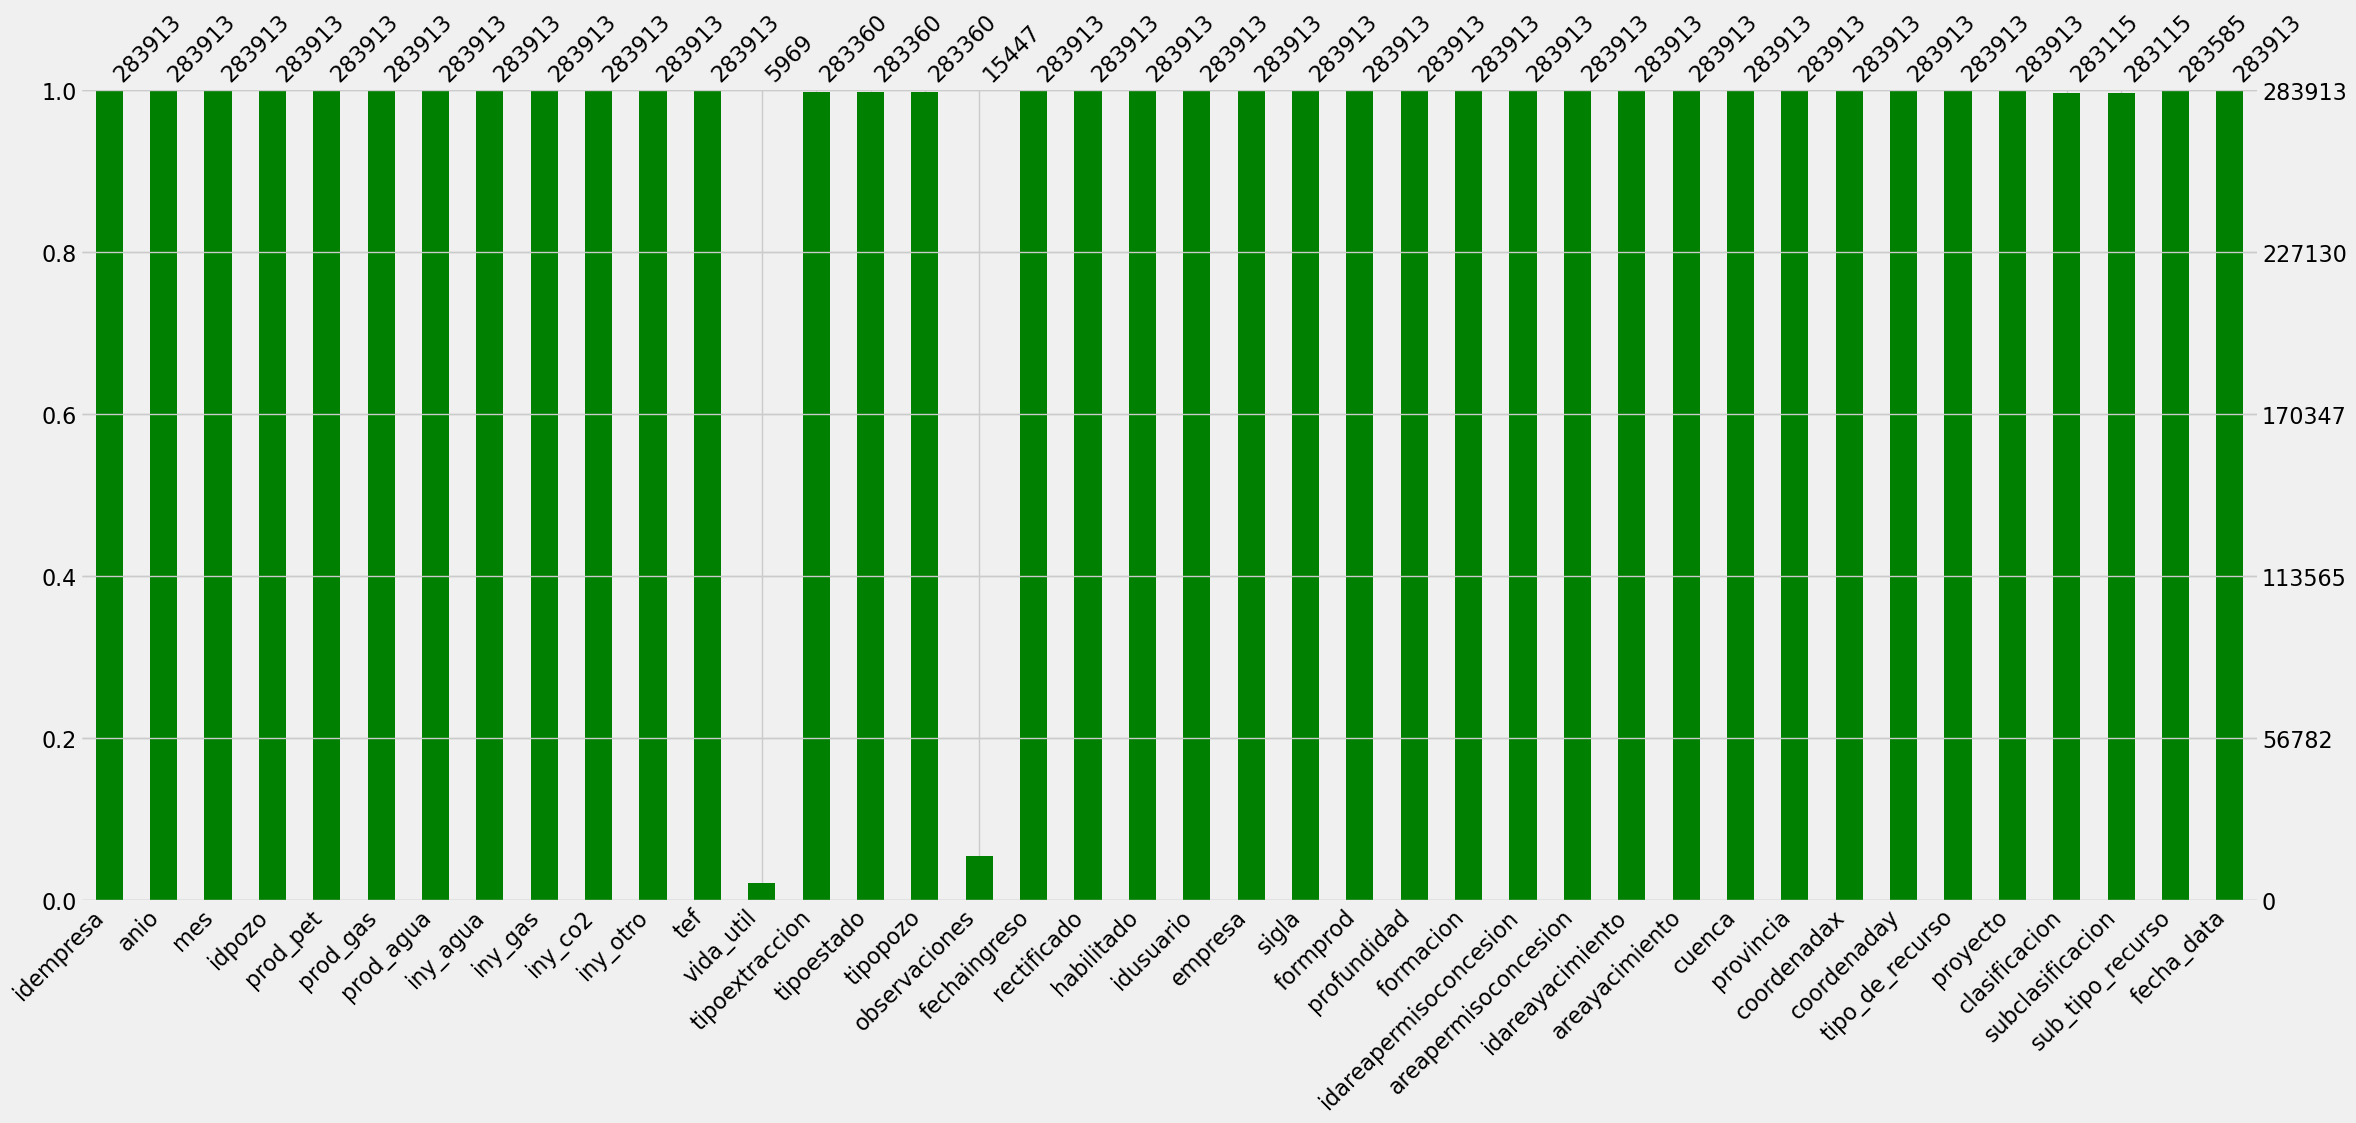

In [25]:
msno.bar(df, color = 'g')

In [26]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

idempresa: 41 distinct values
anio: 18 distinct values
mes: 12 distinct values
idpozo: 3807 distinct values
prod_pet: 89833 distinct values
prod_gas: 136875 distinct values
prod_agua: 84554 distinct values
iny_agua: 226 distinct values
iny_gas: 148 distinct values
iny_co2: 1 distinct values
iny_otro: 1 distinct values
tef: 13891 distinct values
vida_util: 467 distinct values
tipoextraccion: 12 distinct values
tipoestado: 17 distinct values
tipopozo: 7 distinct values
observaciones: 197 distinct values
fechaingreso: 8519 distinct values
rectificado: 2 distinct values
habilitado: 1 distinct values
idusuario: 41 distinct values
empresa: 41 distinct values
sigla: 3623 distinct values
formprod: 26 distinct values
profundidad: 2285 distinct values
formacion: 26 distinct values
idareapermisoconcesion: 107 distinct values
areapermisoconcesion: 107 distinct values
idareayacimiento: 146 distinct values
areayacimiento: 145 distinct values
cuenca: 4 distinct values
provincia: 6 distinct values
coo

In [27]:
# Check what the columns are and what shape our dataset is in
print('Columns in the data frame.')
print(df.columns,df.shape)


Columns in the data frame.
Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object') (283913, 40)


In [37]:
# We don't need all these columns. Let's take what we need for now, and leave what we don't behind (commented out)
df=df[['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua',
      #'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       #'vida_util', 'tipoextraccion', 
      'tipoestado', 'tipopozo',
      # 'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
      # 'idusuario',
      'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 
      'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', "coordenadax" ,"coordenaday" ,
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data']].copy()

#CAMBIO LAS COLUMNAS DE NOMBRE DE COORDENDAS POR LO QUE REALMENTE SON:

df=df.rename(columns={"coordenadax":'long_WGS84', "coordenaday":"lat_WGS84"})



KeyError: "['coordenadax', 'coordenaday'] not in index"

In [39]:
df['provincia'] = df['provincia'].replace('Neuquén', 'Neuquen')

print(df["provincia"].unique())

['Neuquen' 'Rio Negro' 'Chubut' 'Mendoza' 'Santa Cruz' 'Salta']


In [40]:
# Drop an index if it doesn't have a valid anio/año (year) or mes (month) columns since that makes it are useless to us.
df = df.dropna(subset=['anio', 'mes'])

In [41]:
# Our data set has some problems with the anio column, let's make sure it's a valid int
df['anio'] = pd.to_numeric(df['anio'], errors='coerce').astype(int)
# Generate fecha (data) datetime-typed column out of anio and mes
df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str))
# Now let's see...
print('Dates we generated, sorted from oldest to newest. They should be formated YYYY-MM-DD if all is right.\n')
print(df.sort_values(by=['fecha'])['fecha'])

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20512\361397742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anio'] = pd.to_numeric(df['anio'], errors='coerce').astype(int)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_20512\361397742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str))


Dates we generated, sorted from oldest to newest. They should be formated YYYY-MM-DD if all is right.

262295   2010-01-01
7743     2010-01-01
248310   2010-01-01
248309   2010-01-01
7745     2010-01-01
            ...    
157091   2023-12-01
157093   2023-12-01
157095   2023-12-01
157099   2023-12-01
283912   2023-12-01
Name: fecha, Length: 275125, dtype: datetime64[ns]


In [42]:
# Let's check total invalid entries for each column
print('Sum of invalid entries per column. Looks like nothing that is of primary interest to us has invalid entries.\n')
print(df.isna().sum())

Sum of invalid entries per column. Looks like nothing that is of primary interest to us has invalid entries.

idempresa                   0
anio                        0
mes                         0
idpozo                      0
prod_pet                    0
prod_gas                    0
prod_agua                   0
tipoestado                524
tipopozo                  524
empresa                     0
sigla                       0
formprod                    0
profundidad                 0
formacion                   0
idareapermisoconcesion      0
areapermisoconcesion        0
idareayacimiento            0
areayacimiento              0
cuenca                      0
provincia                   0
long_WGS84                  0
lat_WGS84                   0
tipo_de_recurso             0
proyecto                    0
clasificacion             672
subclasificacion          672
sub_tipo_recurso          328
fecha_data                  0
fecha                       0
dtype: int64


In [43]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

In [44]:
df.describe().T.style.background_gradient(axis=0, cmap='Set2')

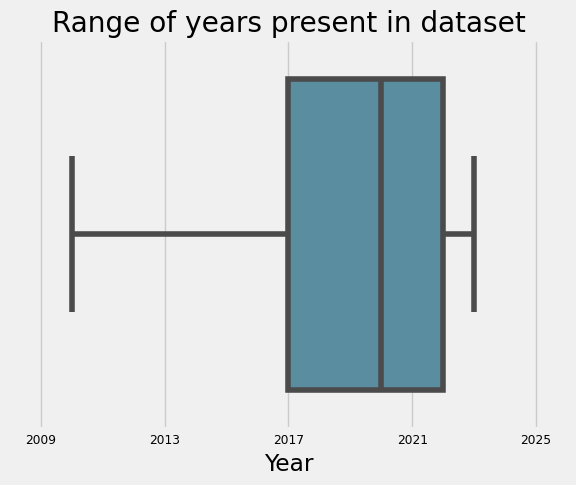

In [45]:
# Generate axes ticks
tick_spacing = 4
ticks = [df['anio'].min() - 1]
while np.max(ticks) < df['anio'].max():
    ticks.append(np.max(ticks) + tick_spacing)

# Generate the plot
fig, ax = plt.subplots()
sns.boxplot( x = df['anio'], 
            color='#5092AB',
            #linecolor = 'black',
            flierprops={"marker": "D", "markerfacecolor" : "#5092AB"}
           )
ax.set_xlim(np.min(ticks) - 1, np.max(ticks) + 1)    # Need to +-1 to make sure ends of graph and ticks not cut off
plt.xticks(ticks)
plt.title('Range of years present in dataset')
plt.xlabel('Year')
plt.show()

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20512\78177789.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anio']=df['anio'][(df['anio'] >= lower_lim)]
C:\Users\Felipe\.conda\envs\CV\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


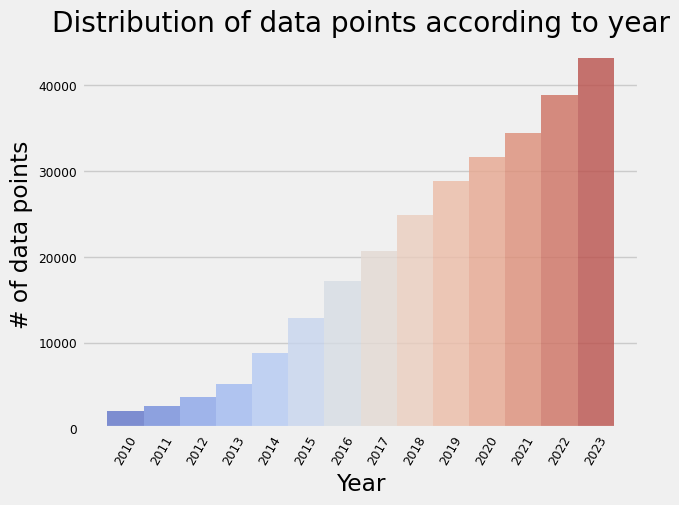

In [46]:
# Filter out data with outlier years via inter-quartile range (IRQ)

#Calculate IQR
Q1 = df['anio'].quantile(0.25)
Q3 = df['anio'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits for identifying outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Filter the outliers from the dataframe
df['anio']=df['anio'][(df['anio'] >= lower_lim)]

hist_df = df.groupby(['anio']).size().reset_index(name='count')
hist_df['anio'] = (hist_df['anio'].astype(int)).astype(str)

#print(hist_df)


# Plot a histogram
fig = sns.barplot(data = hist_df,
                  x = 'anio',
                  y = 'count',
                  #hue = 'count',
                  width = 1,
                  palette = 'coolwarm',
                  alpha = 0.8
                 )


sns.histplot(data=hist_df, x='anio', bins=10, kde=False, color='blue', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('# of data points')
fig.set_xticklabels(hist_df['anio'], rotation=60)
plt.title('Distribution of data points according to year')
plt.show()

In [47]:
# Get rid of outliers with respect to depth (profundiad)

# Calculate interquartile range (IQR) and filter
Q1 = df['profundidad'].quantile(0.25)
Q3 = df['profundidad'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
df['profundidad_filtered'] = df['profundidad'][(df['profundidad'] >= lower_lim) & (df['profundidad'] <= upper_lim)]

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20512\1501595358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profundidad_filtered'] = df['profundidad'][(df['profundidad'] >= lower_lim) & (df['profundidad'] <= upper_lim)]


In [48]:
df.to_csv('df_EDA.csv',header=True)

# EXTRA INFORMATION ABOUT DATASET

## We can see that, thankfully, most data is recent.

## We're gonna keep from the entries from the three companies with the most data.

In [49]:
# Group and count number of datapoints by company ID, then sort by count
df_idempresa = df.groupby(['idempresa']).size().reset_index(name='datapoints').sort_values(by = ['datapoints'], ascending = False)

# List the top three companies
print('Top three companies in terms of datapoints')
print(df_idempresa.head(3))

Top three companies in terms of datapoints
   idempresa  datapoints
39       YPF      155032
26       PLU       14748
5        APS       14427


## The three companies with the most datapoints are YPF, APS, and PLU. We'll proceed accordingly.

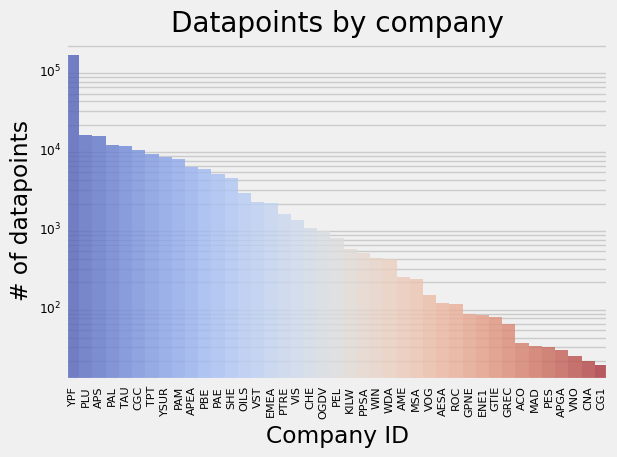

In [50]:
YPF = df.query('idempresa=="YPF" and 2010 <= anio')
APS = df.query('idempresa=="APS" and 2010 <= anio')
PLU = df.query('idempresa=="PLU" and 2010 <= anio')

# Create a histogram 
fig = sns.barplot(data = df_idempresa,
                  x = "idempresa", 
                  y = "datapoints",
                  #hue = 'datapoints',
                 # hue_norm = LogNorm(vmin=df_idempresa['datapoints'].min(), vmax=df_idempresa['datapoints'].max()),
                  palette = 'coolwarm',
                  alpha = 0.8,
                  #legend = None,
                  width = 1)
fig.set_yscale("log")
plt.grid(which = 'both', axis = 'y')
plt.title('Datapoints by company')
plt.xlabel('Company ID')
plt.ylabel('# of datapoints')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Note the above graph is *logarithmic* in scale. 

## Let's concatenate data from the top three companies into a new data frame.


In [51]:
companies = ['YPF','APS','PLU']
df_final=df.query('idempresa == @companies and 2010 <= anio <= 2023').sort_values(by = ['idpozo']).reset_index()

#Let's see the "final" data frame after all our filtering
df_final

index idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  \
0       263328       APS  2021    2   10073     13.99    706.32      14.00   
1       265921       APS  2023    4   10073     10.62    391.69      23.57   
2       276049       APS  2023   12   10073     14.34    364.27      21.18   
3       265759       APS  2020    4   10073     14.57    883.68      36.00   
4       267309       APS  2023    5   10073      8.34    304.57      27.79   
...        ...       ...   ...  ...     ...       ...       ...        ...   
184202  157365       YPF  2023   12  164884     21.04      2.92      72.62   
184203  157361       YPF  2023   12  164885     22.56      3.40      98.16   
184204  157355       YPF  2023   12  164886      0.40      0.05       1.10   
184205  157349       YPF  2023   12  164887   1230.46    107.96     133.99   
184206  157371       YPF  2023   12  164889      0.00      0.00       0.00   

                 tipoestado     tipopozo  ... long_WGS84  lat_WGS84  \
0       Extracción Efectiva     Gasífero  ... -67.669980 -38.832360   
1       Extracción Efectiva     Gasífero  ... -67.669980 -38.832360   
2       Extracción Efectiva     Gasífero  ... -67.669980 -38.832360   
3       Extracción Efectiva     Gasífero  ... -67.669980 -38.832360   
4       Extracción Efectiva     Gasífero  ... -67.669980 -38.832360   
...                     ...          ...  ...        ...        ...   
184202  Extracción Efectiva  Petrolífero  ... -68.637077 -38.273073   
184203  Extracción Efectiva  Petrolífero  ... -68.636974 -38.273072   
184204  Extracción Efectiva  Petrolífero  ... -68.636871 -38.273072   
184205  Extracción Efectiva  Petrolífero  ... -68.681921 -38.254225   
184206  Abandono Temporario     Gasífero  ... -67.679160 -38.862105   

        tipo_de_recurso      proyecto clasificacion subclasificacion  \
0       NO CONVENCIONAL  Sin Proyecto   EXPLOTACION         AVANZADA   
1       NO CONVENCIONAL  Sin Proyecto   EXPLOTACION         AVANZADA   
2       NO CONVENCIONAL  Sin Proyecto   EXPLOTACION         AVANZADA   
3       NO CONVENCIONAL  Sin Proyecto   EXPLOTACION         AVANZADA   
4       NO CONVENCIONAL  Sin Proyecto   EXPLOTACION         AVANZADA   
...                 ...           ...           ...              ...   
184202  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
184203  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
184204  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
184205  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
184206  NO CONVENCIONAL  Sin Proyecto   EXPLORACION      EXPLORACION   

       sub_tipo_recurso  fecha_data      fecha profundidad_filtered  
0                 TIGHT  2021-02-28 2021-02-01               3850.0  
1                 TIGHT  2023-04-30 2023-04-01               3850.0  
2                 TIGHT  2023-12-31 2023-12-01               3850.0  
3                 TIGHT  2020-04-30 2020-04-01               3850.0  
4                 TIGHT  2023-05-31 2023-05-01               3850.0  
...                 ...         ...        ...                  ...  
184202            SHALE  2023-12-31 2023-12-01               5709.0  
184203            SHALE  2023-12-31 2023-12-01               5610.0  
184204            SHALE  2023-12-31 2023-12-01               5695.0  
184205            SHALE  2023-12-31 2023-12-01               5752.0  
184206            TIGHT  2023-12-31 2023-12-01               3900.0  

[184207 rows x 31 columns]

## We graph production by company by year. Again, note the logarithmic scale of the plot.

C:\Users\Felipe\.conda\envs\CV\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Petroleum production in $m^3$')

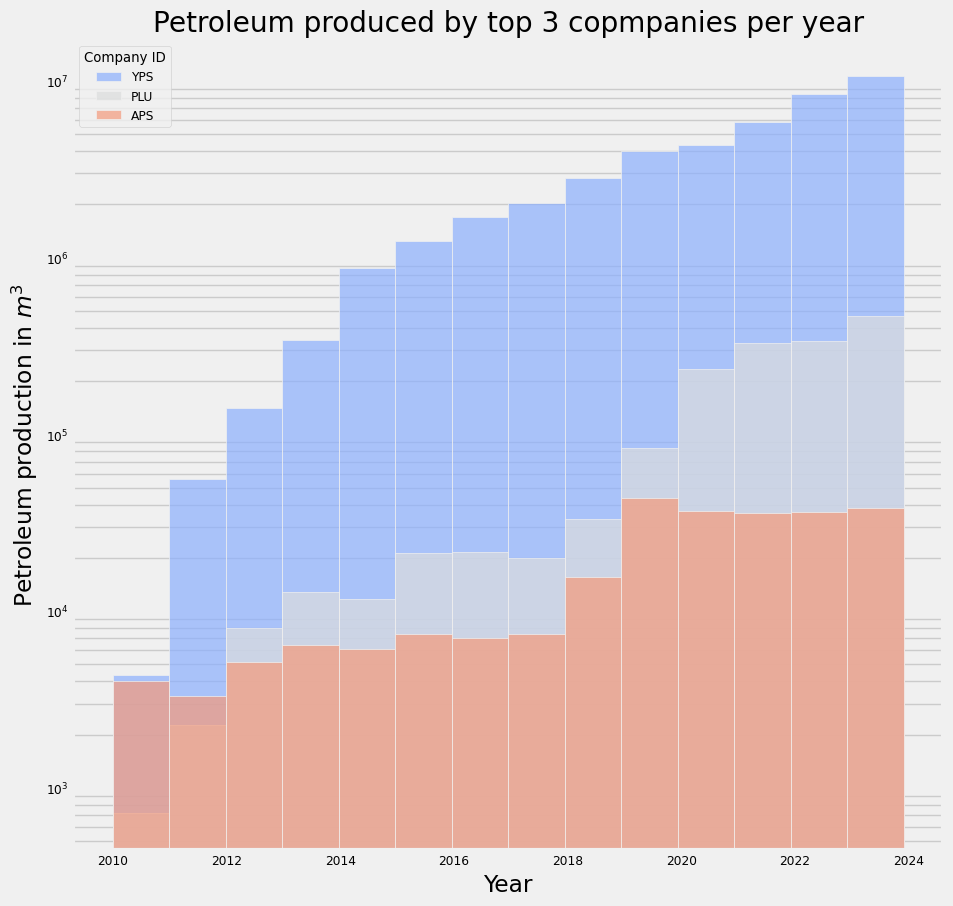

In [52]:
df_prod = df_final.groupby(['idempresa', 'fecha'])['prod_pet'].sum().reset_index()
companies = df_prod['idempresa'].unique()
years = np.sort(df_final['anio'].unique().astype(int))

plt.subplots(figsize = (10,10))
fig = sns.histplot(data = df_prod,
                   stat = 'count',
                   x = 'fecha',
                   multiple = 'layer',
                   hue = 'idempresa',
                   weights = 'prod_pet',
                   palette = 'coolwarm_r',
                   alpha = 0.7,
                   bins = len(years),
                   legend = False
                   )
plt.legend(title='Company ID', loc='upper left', labels=['YPS', 'PLU', 'APS'])     # Can double check correct via legend = True inside plot and commenting this line out
fig.set_yscale("log")
plt.grid(which = 'both', axis = 'both')
plt.title('Petroleum produced by top 3 copmpanies per year')
plt.xlabel('Year')
plt.ylabel('Petroleum production in $m^3$')

# We are interested in observing oil production about depth to determine at what depth the productive formations are located and to assess the correlation between production and depth

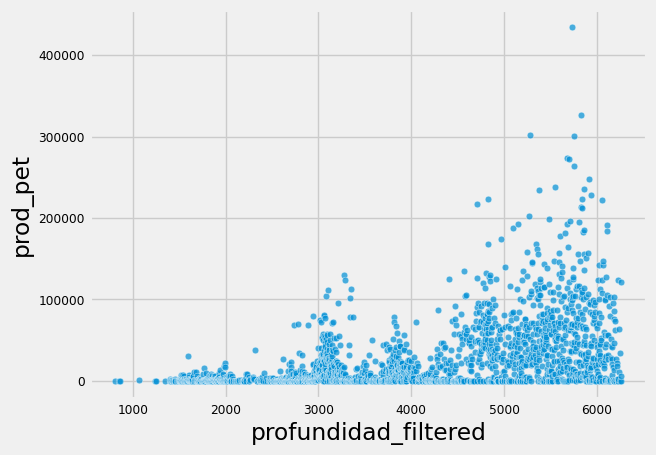

                      profundidad_filtered  prod_pet
profundidad_filtered              1.000000  0.483603
prod_pet                          0.483603  1.000000
Coeficiente de correlación entre 'profundidad' y 'prod_pet': 0.4836025603105918


In [55]:
df_depth = df.groupby(['profundidad_filtered'])['prod_pet'].sum().reset_index()

# Tu código original con sns.lineplot modificado a sns.scatterplot
fig = sns.scatterplot(data=df_depth,
                      x='profundidad_filtered',
                      y='prod_pet',
                      #palette='coolwarm_r',
                      alpha=0.7,
                      legend=False
                      )

plt.grid(True, which='both', axis='both')
plt.show()

# Suponiendo que df_depth es tu DataFrame
correlation_matrix = df_depth[['profundidad_filtered', 'prod_pet']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)
# Obtener el coeficiente de correlación específico entre 'profundidad' y 'prod_pet'
correlation_value = correlation_matrix.loc['profundidad_filtered', 'prod_pet']
print(f"Coeficiente de correlación entre 'profundidad' y 'prod_pet': {correlation_value}")


#LA CORRELACION DE LA PRODUCCION DE PETROLEO CON LA PROFUNDIAD ES MODERADA A ALTA